Graph 4: phytoplankton biovolume in sediment or water by phytoplankton division (taxa level)
Total number of nodes:  9
Total number of edges:  12


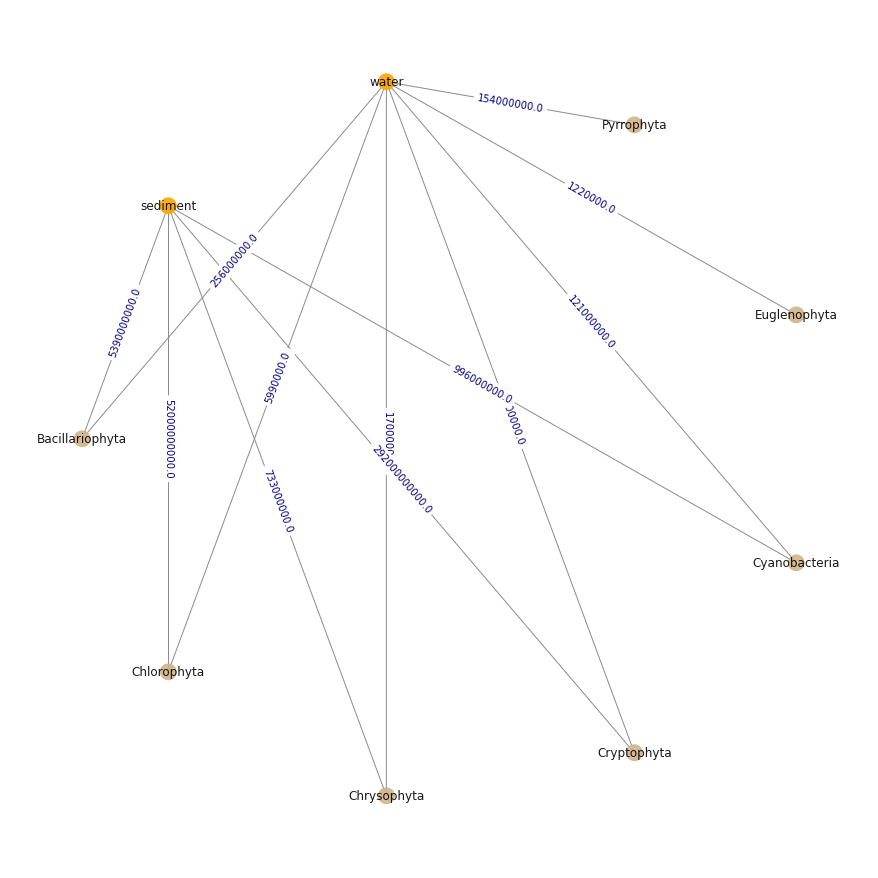

In [43]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Graph4Phyto.csv")
df1 = df
print("Graph 4: phytoplankton biovolume in sediment or water by phytoplankton division (taxa level)")


G4 = nx.Graph()

G4.add_nodes_from(df1['Division'])
G4.add_nodes_from(df1['SampleType'])

#edge_list = df.loc[0::346, 'prey_weight_g']

# Here the changes begin:


# Construct the edge_list and add it to graph with weights:
edge_list = df1[['Division','SampleType','Biovolume']] #changed syntax
edge_list2 = list(edge_list.itertuples(index=False))

G4.add_weighted_edges_from(edge_list2)

print("Total number of nodes: ", int(G4.number_of_nodes()))
print("Total number of edges: ", int(G4.number_of_edges()))


# Create dictionary of edge labels: 

edge_labels_key = df1[['Division','SampleType']].itertuples(index=False)
edge_labels_dict = dict(zip(edge_labels_key, df1['Biovolume'].round(decimals = 4)))

# Style and show graph: 
pos = nx.shell_layout(G4,scale=1)

# Make graph styling 
plt.figure(3,figsize=(12,12))
   
color_map = ['orange' if node == 'sediment' or node == 'water' else 'tan' for node in G4]        

nx.draw(G4, pos, node_color = color_map, font_color = 'black', edge_color='grey', width=1, linewidths=1,
    node_size=250,  alpha=0.9, with_labels = True)
        
nx.draw_networkx_edge_labels(G4, pos, edge_labels = edge_labels_dict, font_color = 'navy')
plt_size = (105,150)
label_offset = -20
plt.show()
